# Exam 2 - Data Operations and plotting using Python, pandas, and matplotlib
<font color='red'>아래 문제에서 pandas를 사용하라고 한 문제이외의 문제에서는 pandas를 절대 사용하면 안됨.</font>

## Setup

In [33]:
import csv
import pandas as pd
from matplotlib import pyplot as plt

### Problem 1
Football.csv로부터 데이터를 읽어들여 한 game(한 행)이 한 dictionary이며 그 dictionary들을 원소로 갖는 football이라는 이름의 list를 만들고 그 list내 두번째 dictionary를 출력하시오. 또한, list내 마지막 dictionary의 Prediction 값도 출력하시오. 
Schoolkids.csv로부터 데이터를 읽어들여 한 학생(한 행)이 한 dictionary이며 그 dictionary들을 원소로 갖는 schoolkids라는 이름의 list를 만들고 그 list내 두번째 dictionary를 출력하시오. 또한, list내 마지막 dictionary의 Goal 값도 출력하시오. 
매 출력전에 무엇을 출력하는지 print문을 이용하여 알리시오.

In [34]:
football = []
with open('Football.csv', 'rU') as file:
    data = csv.DictReader(file)
    for row in data:
        football.append(row)
schoolkids = []
with open('Schoolkids.csv', 'rU') as file:
    data = csv.DictReader(file)
    for row in data:
        schoolkids.append(row)
print "\nSecond entry in football list, and last element's Predicton:"
print football[1]
print football[len(football)-1]["Prediction"]
print "\nSecond entry in schookids list, and last element's Goal:"
print schoolkids[1]
print schoolkids[len(schoolkids)-1]["Goal"]


Second entry in football list, and last element's Predicton:
{'Week': '1', 'AwayScore': '24', 'Away': 'Jacksonville', 'Prediction': '-8.5', 'HomeScore': '23', 'Year': '1998', 'Home': 'Chicago'}
13.5

Second entry in schookids list, and last element's Goal:
{'School': 'Elm', 'Goal': 'Popular', 'Grade': '5', 'Gender': 'boy', 'Age': '10', 'Sports': '1', 'Grades': '2', 'Looks': '4', 'Money': '3', 'Type': 'Rural'}
Popular


### Problem 2
Football data에 있는 모든 game에 대해 prediction과 실제 결과의 차이의 평균값을 구하시오. HomeScore와 AwayScore가 실제 score이고 Prediction은 home팀이 away팀을 얼마의 점수차로 이기거나(양수) 혹은 질것이냐(음수)에 대한 예측치임. 따라서 실제 결과 = (HomeScore - AwayScore)이며 차이 = (Prediction – 실제 결과)임. 양수 또는 음수 한 개로 평균값을 출력하는 Python 프로그램을 작성하면 됨. 

In [35]:
total = 0
for game in football:
    total += float(game['Prediction']) - (float(game['HomeScore']) - \
            float(game['AwayScore']))
print total/len(football)

-0.96875


### Problem 3
Problem 2를 pandas를 이용하여 프로그램하시오. Football.csv로부터 자료를 읽어 들이는 것 포함하여 문장 2개만 사용하여 구현하시오.

In [36]:
FB_dataframe = pd.read_csv("Football.csv")
(FB_dataframe.Prediction - (FB_dataframe.HomeScore - FB_dataframe.AwayScore)).mean()

-0.96875

### Problem 4
football list에서 다음을 만족하는 모든 team쌍과 그 갯수를 출력하시오. 1998년의 home team이 1999년에도 home team이었고 1998년의 away team이 1999년에도 away team으로 유지되었으며 1998년에는 home team이 이겼고 1999년에는 away team이 이겼음. 위 두 조건을 만족하는 모든 team 쌍과 그 team쌍의 갯수를 출력하는 Python 프로그램을 작성하면 됨.  

In [37]:
count = 0
for game1 in football:
    for game2 in football:
        if game1['Year'] == '1998' and game2['Year'] == '1999' \
            and game1['Home'] == game2['Home'] \
            and game1['Away'] == game2['Away'] \
            and float(game1['HomeScore']) > float(game1['AwayScore']) \
            and float(game2['HomeScore']) < float(game2['AwayScore']):
            print 'Team1:', game1['Home'], '|', 'Team2:', game1['Away']
            count += 1
print '갯수 : ', count

Team1: NY_Giants | Team2: Washington
Team1: Kansas_City | Team2: Oakland
Team1: Miami | Team2: Buffalo
Team1: NY_Jets | Team2: Indianapolis
Team1: Pittsburgh | Team2: Seattle
Team1: Tampa Bay | Team2: NY_Giants
Team1: Kansas_City | Team2: Seattle
Team1: Cincinnati | Team2: Pittsburgh
Team1: Pittsburgh | Team2: Baltimore
Team1: NY_Giants | Team2: Arizona
Team1: New_Orleans | Team2: Tampa Bay
Team1: Atlanta | Team2: St._Louis
Team1: Miami | Team2: Indianapolis
Team1: San_Francisco | Team2: Carolina
Team1: Arizona | Team2: Washington
Team1: Denver | Team2: San_Diego
Team1: New_Orleans | Team2: St._Louis
Team1: Pittsburgh | Team2: Jacksonville
Team1: New_England | Team2: Miami
Team1: New_England | Team2: Buffalo
Team1: Denver | Team2: Kansas_City
Team1: Minnesota | Team2: Chicago
Team1: Green_Bay | Team2: Chicago
Team1: Buffalo | Team2: Oakland
Team1: Seattle | Team2: San_Diego
Team1: Carolina | Team2: St._Louis
Team1: NY_Jets | Team2: New_England
Team1: San_Francisco | Team2: St._Louis
갯수

### Problem 5 
schoolkids list에서 얼마나 많은 4, 5, 6학년 학생들이 popularity를 결정하는데 Looks가 Grades보다 중요하다고 생각하는지 각 학년별 학생수를 4. 5. 6학년 순으로 구하여 출력하시오. 학년별로 숫자 한 개를 출력하는 Python 프로그램을 작성하면 됨.  

In [38]:
fourth = 0
fifth = 0
sixth = 0
for s in schoolkids:
    if s['Grade'] == '4' and s['Looks'] < s['Grades']: fourth += 1
    if s['Grade'] == '5' and s['Looks'] < s['Grades']: fifth += 1
    if s['Grade'] == '6' and s['Looks'] < s['Grades']: sixth += 1
print 'Fourth:', fourth, ' Fifth:', fifth, ' Sixth:', sixth

Fourth: 60  Fifth: 95  Sixth: 137


### Problem 6
schoolkids list에서가장 나이가 많은(age 값이 가장 큰) 학생(들)을 찾아 그들의 gender, grade, age, school을 출력하는 Python 프로그램을 작성하시오. 

In [39]:
maxage = max([int(s['Age']) for s in schoolkids])
for s in schoolkids:
    if int(s['Age']) == maxage:
        print s['Gender'], '|', s['Grade'], '|', s['Age'], '|', s['School']

girl | 6 | 13 | Brentwood Middle
boy | 6 | 13 | Brentwood Middle
boy | 6 | 13 | Brown Middle
boy | 6 | 13 | Brown Middle


### Problem 7
football list에서 home team이 이긴 모든 game의 prediction의 평균값과 away team이 이긴 모든 game의 prediction의 평균값을 구해 소숫점 이하 둘째 자리까지만 출력하는 Python 프로그램을 작성하시오. 두 값에 대해 어느 것이 home team 것이고 어느 것이 away team 것인지도 표시하시오. 소숫점이하 둘째 자리는 print문에 {0:.2f} 포맷을 사용하면 됨.

In [40]:
Hpredictions = []
Apredictions = []
for game in football:
    if float(game['HomeScore']) > float(game['AwayScore']):
        Hpredictions.append(float(game['Prediction']))
    if float(game['HomeScore']) < float(game['AwayScore']):
        Apredictions.append(float(game['Prediction']))
print ('Average Prediction for Home wins: {0:.2f}'.format(sum(Hpredictions)/len(Hpredictions)))
print ('Average Prediction for Home wins: %.2f'%(sum(Hpredictions)/len(Hpredictions)))
print ('Average Prediction for Away wins: {0:.2f}' .format(sum(Apredictions)/len(Apredictions)))

Average Prediction for Home wins: 4.03
Average Prediction for Home wins: 4.03
Average Prediction for Away wins: -0.42


### Problem 8
schoolkids list에서 popularity에 관련된 4개의 factor인 Grades, Sports, Looks, Money에 대해 모든 학생들을 통틀어 보았을 때 중요한 순서대로 출력하는 Python 프로그램을 작성하시오. 각 factor의 중요도는 모든 학생들의 그 factor값을 합한 것이며 그 값이 작을수록 더 중요한 것임. [Hint: 만약 variable L이 list of tuples (or list of lists)이고 각 tuple (or list) 의 N번째 요소를 기준으로 오름차순으로 sort 해서 SL이라는 list of tuples (or list of lists)을 만들고 싶다면 아래 code를 사용하면 됨. 여기서 x와 key=lambda는 L에 상관없이 항상 그대로 쓰면 됨.]

SL = sorted(L, key=lambda x: x[N])

내림차순으로 sort하고 싶을때는

SL = sorted(L, key=lambda x: x[N], reverse=True)

In [41]:
grades = 0
sports = 0
looks = 0
money = 0
for s in schoolkids:
    grades += int(s['Grades'])
    sports += int(s['Sports'])
    looks += int(s['Looks'])
    money += int(s['Money'])
factors = [('Grades',grades),('Sports',sports),('Looks',looks),('Money',money)]
sorted_factors = sorted(factors,key=lambda x: x[1])
print sorted_factors[0][0], sorted_factors[1][0], sorted_factors[2][0], \
sorted_factors[3][0]

Sports Looks Grades Money


In [42]:
grades = 0
sports = 0
looks = 0
money = 0
for s in schoolkids:
    grades += int(s['Grades'])
    sports += int(s['Sports'])
    looks += int(s['Looks'])
    money += int(s['Money'])
factors = [('Grades',grades),('Sports',sports),('Looks',looks),('Money',money)]
sorted_factors = sorted(factors,key=lambda x: x[1], reverse=True)
print sorted_factors[0][0], sorted_factors[1][0], sorted_factors[2][0], \
sorted_factors[3][0]

Money Grades Looks Sports


### Problem 9
Schoolkids data를 읽어들여 학교별 Age의 평균값을 구하는 방법 두 가지를 제시하시오. 반드시 pandas만을 사용하고 두 방법으로부터의 출력이 한 개의 cell안에서 모두 출력되도록 프로그램하시오.첫번째 방법에서는 mean()을 사용하고 두번째 방법에서는 mean()을 사용하지 마시오.

In [43]:
SK_dataframe = pd.read_csv("Schoolkids.csv")
print SK_dataframe.groupby('School').Age.mean()
SK_dataframe.groupby('School').Age.sum()/SK_dataframe.groupby('School').Age.size()

School
Brentwood Elementary    10.149254
Brentwood Middle        11.380952
Brown Middle            11.384615
Elm                      9.809524
Main                     9.779412
Portage                  9.754098
Ridge                    9.750000
Sand                     9.857143
Westdale Middle         11.102041
Name: Age, dtype: float64


School
Brentwood Elementary    10.149254
Brentwood Middle        11.380952
Brown Middle            11.384615
Elm                      9.809524
Main                     9.779412
Portage                  9.754098
Ridge                    9.750000
Sand                     9.857143
Westdale Middle         11.102041
Name: Age, dtype: float64

### Problem 10
문제 9에서 얻은 데이터를 bar graph로 그리시오. x축은 학교이름, y축은 Age의 평균임. x축에 학교이름이 오름차순으로 tick mark와 함께 표시되어야 함. x축의 label은 School_name, y축의 label은 Age_mean으로 할 것. graph size는 문제에 주어진 figsize=(20, 6)을 그대로 사용할 것. graph전체의 title은 Mean_Age_for_School로 하고 bar의 width는 0.35로 하시오. 반드시 pandas와 matplotlib을 사용하시오.
[Hint: 문제 9에서 얻은 mean값은 학교이름의 오름차순으로 이미 정렬되어 있음. pandas에서 중복을 제거하는 함수는 unique()임.]

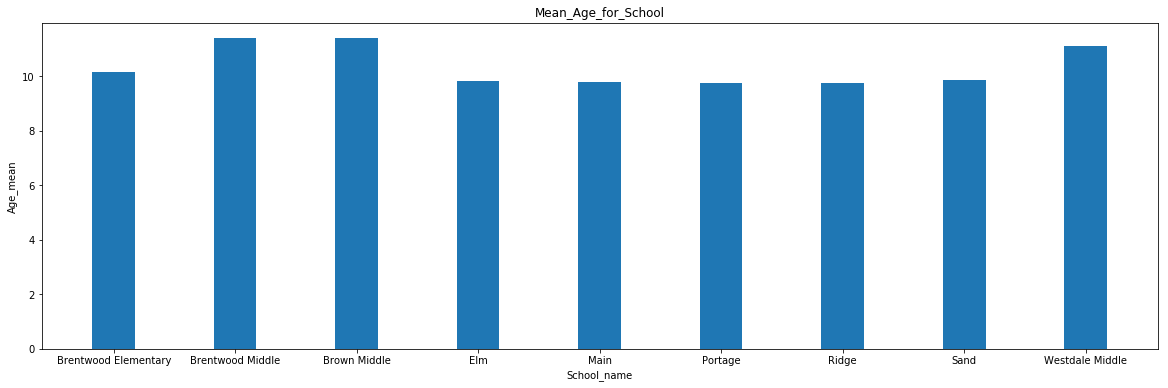

In [44]:
SK_dataframe = pd.read_csv("Schoolkids.csv")
school = SK_dataframe.School.unique()
sorted_school = sorted(school,key=lambda x: x[0])
age_mean = SK_dataframe.groupby('School').Age.mean()

plt.figure(figsize=(20, 6))
n = len(age_mean)
width = 0.35
plt.bar(range(n), age_mean, width)
plt.xlabel('School_name')
plt.ylabel('Age_mean')
plt.title('Mean_Age_for_School')
plt.xticks(range(n), sorted_school)
plt.show()
plt.close()